In [1]:
from coba.benchmarks import Result
from coba.analysis import Plots
import numpy as np
import pandas as pd

In [79]:
result = Result.from_transaction_file('benchmark.log')

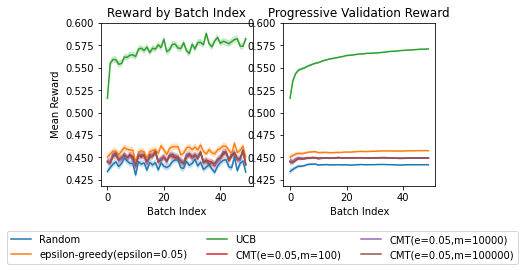

In [80]:
Plots.standard_plot(result, show_err=True)

In [82]:
l,s,b = result.to_pandas()

In [83]:
b.groupby('learner_id').mean().join(l).sort_values('reward')

,simulation_id,batch_index,N,reward,learner_id,family,full_name,epsilon,e,m
learner_id,,,,,,,,,,
0,1517.385894,24.500000,925.355539,0.443742,0,Random,Random,NaN,NaN,NaN
3,1517.385894,24.500000,925.355539,0.450091,3,CMT,"CMT(e=0.05,m=100)",NaN,0.05,100.0
4,1517.385894,24.500000,925.355539,0.450192,4,CMT,"CMT(e=0.05,m=10000)",NaN,0.05,10000.0
5,1517.252268,24.498316,923.699634,0.450422,5,CMT,"CMT(e=0.05,m=100000)",NaN,0.05,100000.0
1,1517.385894,24.500000,925.355539,0.459199,1,epsilon-greedy,epsilon-greedy(epsilon=0.05),0.05,NaN,NaN
2,1517.385894,24.500000,925.355539,0.569077,2,UCB,UCB,NaN,NaN,NaN


In [84]:
pd.merge(l,b[b.batch_index == 0].groupby('learner_id').mean(), on='learner_id').sort_values('reward')

,learner_id,family,full_name,epsilon,e,m,simulation_id,batch_index,N,reward
0,0,Random,Random,NaN,NaN,NaN,1517.385894,0.0,925.391802,0.436405
4,4,CMT,"CMT(e=0.05,m=10000)",NaN,0.05,10000.0,1517.385894,0.0,925.391802,0.447093
3,3,CMT,"CMT(e=0.05,m=100)",NaN,0.05,100.0,1517.385894,0.0,925.391802,0.447428
5,5,CMT,"CMT(e=0.05,m=100000)",NaN,0.05,100000.0,1517.385894,0.0,925.391802,0.447536
1,1,epsilon-greedy,epsilon-greedy(epsilon=0.05),0.05,NaN,NaN,1517.385894,0.0,925.391802,0.452480
2,2,UCB,UCB,NaN,NaN,NaN,1517.385894,0.0,925.391802,0.511215


<AxesSubplot:ylabel='Frequency'>

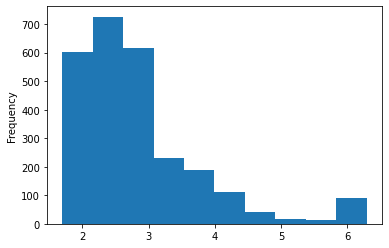

In [7]:
np.log10(s['interaction_count']).plot(kind="hist")

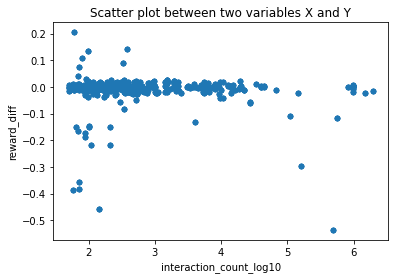

In [85]:
bb = b.copy()
ss = s.copy()

bb.simulation_id = bb.simulation_id.astype('int')
ss.simulation_id = ss.simulation_id.astype('int')

bb['mod_sim_id'] = bb.simulation_id % 497
ss['mod_sim_id'] = ss.simulation_id % 497

bb = bb.groupby(['learner_id','mod_sim_id'], as_index=False).mean()

a = pd.merge(bb[bb.learner_id == 5],ss, on='mod_sim_id')
c = pd.merge(bb[bb.learner_id == 1],ss, on='mod_sim_id')

a.reward = a.reward.astype('float')
c.reward = c.reward.astype('float')

a['reward_diff']             = a.reward - c.reward
a['interaction_count_log10'] = np.log10(a.interaction_count)

a.plot.scatter(x='interaction_count_log10', y='reward_diff', title= "Scatter plot between two variables X and Y");

In [76]:
a.reward_diff.mean()

-0.00881781310481449

In [93]:
(1/s.action_count).mean()

0.4360107380036655